In [80]:
import pandas as pd
df=pd.read_csv('final_prepaid_customers_data_09-Jan-2025.csv')

In [81]:
df.shape

(144019, 20)

In [82]:
df.head()

,SERVICE_NBR,PHASE,TARIFF,POWER_SUSCRIBED,TENSION,DIVISION,ACTIVITY_CMS,REGION,AGENCY,payment_mode,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
0,200050072,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Wholesale and Retail,DCUD,CSC_DEIDO,PREPAID,1,7702,123.854545,196.9,77491.94,3,1,1,1,1
1,200050302,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,PREPAID,1,6443,52.777778,80.0,47500.00,0,1,1,1,1
2,200050326,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Wholesale and Retail,DCUD,CSC_DEIDO,PREPAID,1,7702,186.090323,359.9,467881.92,6,1,1,1,1
3,200050428,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,PREPAID,1,6614,36.470588,60.0,31000.00,1,1,1,1,1
4,200050460,1- Phase,LV,1.1,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Wholesale and Retail,DCUD,CSC_DEIDO,PREPAID,1,7702,89.592105,138.1,345087.48,5,1,1,1,1


In [83]:
df.isnull().sum()

SERVICE_NBR                0
PHASE                      0
TARIFF                     0
POWER_SUSCRIBED            0
TENSION                    0
DIVISION                   0
ACTIVITY_CMS            3945
REGION                     0
AGENCY                     0
payment_mode               0
IsActive                   0
Tenure_Days                0
Avg_Consumption            0
Max_Consumption            0
Total_Payment              0
Spike_Count                0
Has_inspected              0
inspection_count           0
fraud_found_category       0
Found_fraud                0
dtype: int64

In [84]:
df.describe()

,SERVICE_NBR,POWER_SUSCRIBED,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
count,1.440190e+05,144019.000000,144019.000000,144019.000000,144019.000000,144019.000000,1.440190e+05,144019.000000,144019.0,144019.0,144019.000000,144019.000000
mean,2.037162e+08,3.083607,0.996625,1525.229338,123.355498,174.826054,5.001356e+05,3.321714,1.0,1.0,0.511571,0.511571
std,9.002608e+05,3.027780,0.057993,1618.183361,125.291296,199.114147,1.859966e+06,2.201902,0.0,0.0,0.499868,0.499868
min,2.000501e+08,0.000000,0.000000,-222.000000,1.500000,1.500000,0.000000e+00,0.000000,1.0,1.0,0.000000,0.000000
25%,2.037550e+08,2.200000,1.000000,855.000000,65.777778,100.000000,7.110000e+04,2.000000,1.0,1.0,0.000000,0.000000
50%,2.039652e+08,2.200000,1.000000,1082.000000,100.500000,146.000000,1.780000e+05,3.000000,1.0,1.0,1.000000,1.000000
75%,2.041559e+08,3.300000,1.000000,1358.000000,146.602729,201.100000,4.106192e+05,5.000000,1.0,1.0,1.000000,1.000000
max,2.045030e+08,66.000000,1.000000,16356.000000,11901.900000,20345.500000,2.178428e+08,13.000000,1.0,1.0,1.000000,1.000000


In [85]:
df['ACTIVITY_CMS'].value_counts()

ACTIVITY_CMS
Dwelling House                                        135096
Mixed Activities                                        2234
Wholesale and Retail                                    1658
Rent Activities                                          502
Education                                                165
Drinks industry                                          151
Other Activities Provided to the Community                76
Restaurants and Hotels                                    31
Work of Grain                                             27
Social Health and Action                                  21
Repairs Activity                                          17
Services Activities to Companies                          13
Financial Intermediation and Activities                   12
Textile and the Sewing Industry                            9
Milk, Fruits and Other Foodstuffs Industry                 9
Presidency and Attached Services, Administration           6
Clock Indus

In [86]:
df1 = df[['ACTIVITY_CMS', 'Found_fraud']]


In [87]:
df1.value_counts()

ACTIVITY_CMS                                        Found_fraud
Dwelling House                                      1              69078
                                                    0              66018
Mixed Activities                                    1               1267
                                                    0                967
Wholesale and Retail                                1                830
                                                    0                828
Rent Activities                                     1                382
                                                    0                120
Education                                           1                 90
Drinks industry                                     0                 82
Education                                           0                 75
Drinks industry                                     1                 69
Other Activities Provided to the Community          0       

In [88]:
# ACTIVITY usually refers to the type of customer activity or business sector the customer belongs to.

In [89]:
# Select all rows where any column is null
rows_with_any_null = df[df.isnull().any(axis=1)]



In [90]:
rows_with_any_null.Found_fraud.value_counts()

Found_fraud
0    2087
1    1858
Name: count, dtype: int64

In [91]:
# Percentage distribution
print(df['Found_fraud'].value_counts(normalize=True) * 100)



Found_fraud
1    51.157139
0    48.842861
Name: proportion, dtype: float64


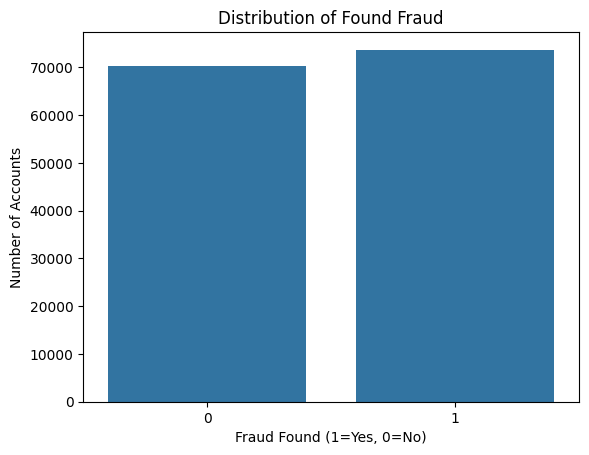

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of fraud distribution
sns.countplot(x='Found_fraud', data=df)
plt.title('Distribution of Found Fraud')
plt.xlabel('Fraud Found (1=Yes, 0=No)')
plt.ylabel('Number of Accounts')
plt.show()


In [93]:
categorical_columns = ['PHASE', 'TARIFF', 'TENSION', 'DIVISION', 'ACTIVITY_CMS', 
                       'REGION', 'AGENCY', 'payment_mode', 'IsActive', 'Has_inspected', 'Found_fraud']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for PHASE:
PHASE
1- Phase     137279
3 - Phase      6740
Name: count, dtype: int64

Value counts for TARIFF:
TARIFF
LV - DOMESTIC               100411
LV                           40592
LV - NON DOMESTIC             2995
LV - ENEO  AGENT                19
LV-CDE/CAMWATER/GLOBELEQ         1
LV - PUBLIC LIGHT                1
Name: count, dtype: int64

Value counts for TENSION:
TENSION
LOW VOLTAGE( 220 )    137301
LOW VOLTAGE( 380 )      6718
Name: count, dtype: int64

Value counts for DIVISION:
DIVISION
DVC DOUALA EST          20329
DVC DOUALA NORD         18717
DVC DOUALA CENTRE       18264
DVC DOUALA OUEST        14157
DVC YAOUNDE EST         12367
DVC YAOUNDE OUEST       10438
DVC YAOUNDE SUD          9794
DVC YAOUNDE NORD         8543
DVC DOUALA SUD           6118
DVC YAOUNDE CENTRE       4929
DVC LIMBE                3773
DPC NORD                 3535
DVC OUEST 1-BAF          2993
DPC BERTOUA              1446
DLP EXTREME-NORD         1412
DLP ADAMAOUA             137

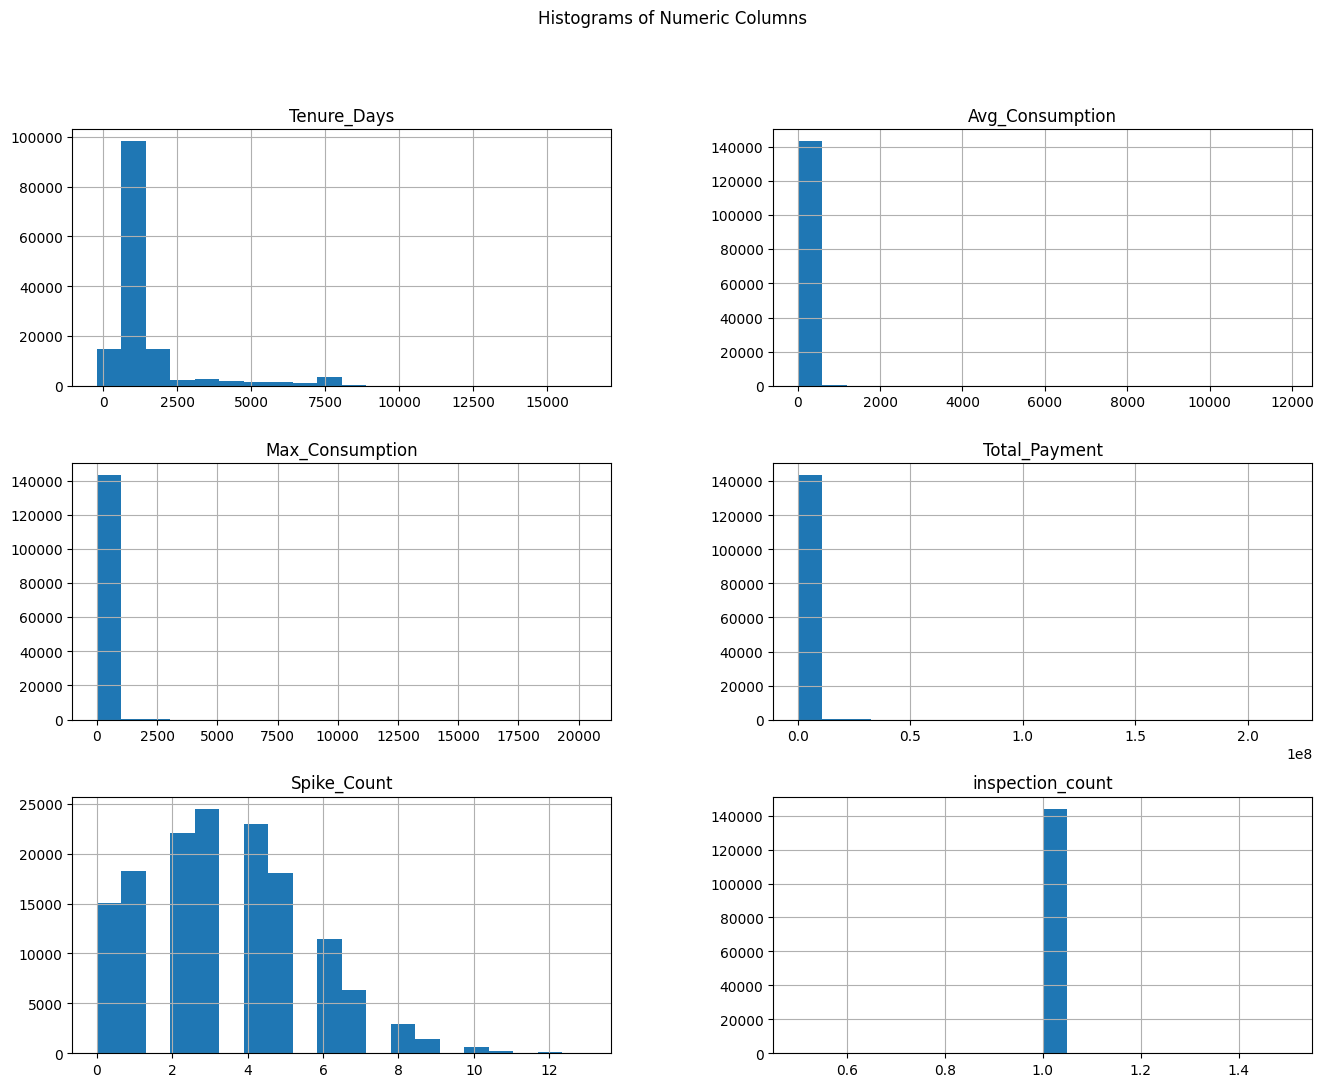

In [94]:
import matplotlib.pyplot as plt

numeric_columns = ['Tenure_Days', 'Avg_Consumption', 'Max_Consumption', 
                   'Total_Payment', 'Spike_Count', 'inspection_count']

df[numeric_columns].hist(bins=20, figsize=(16, 12))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

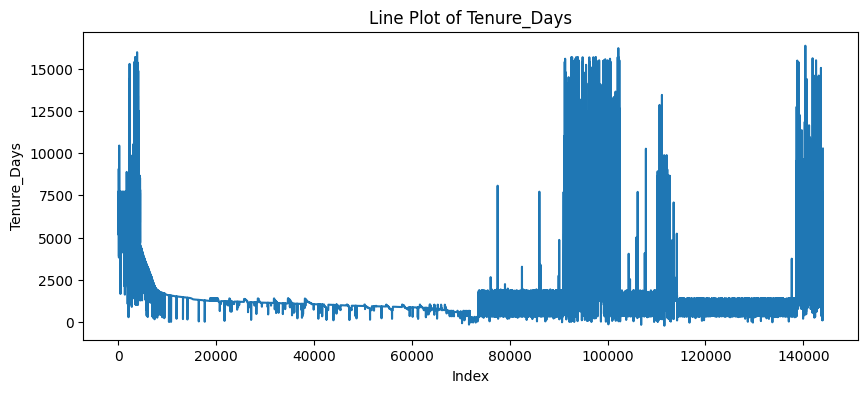

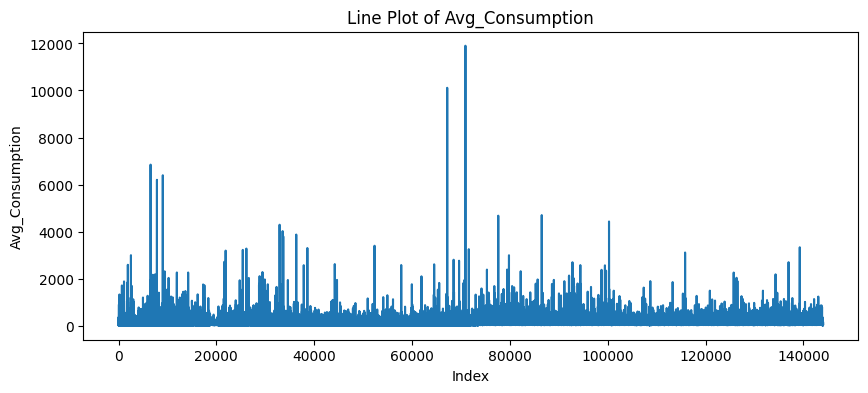

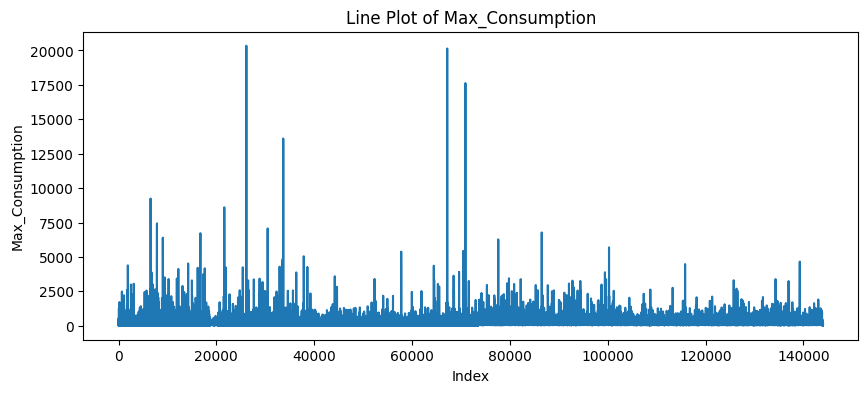

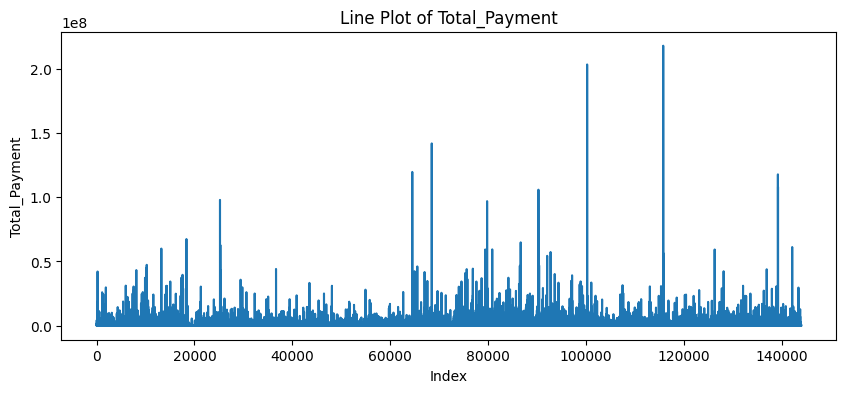

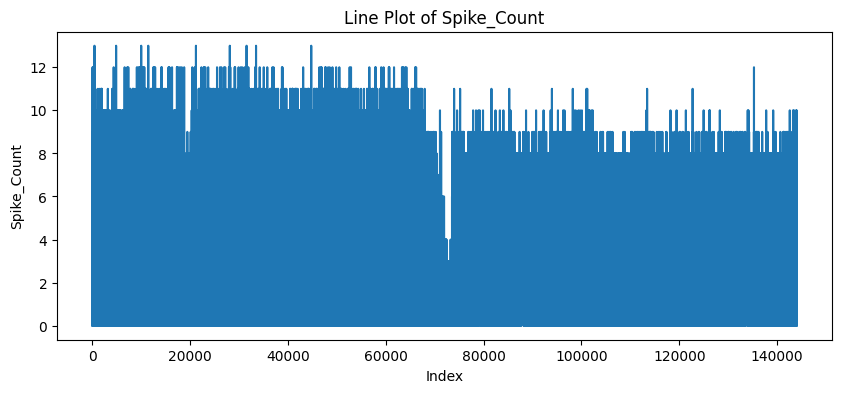

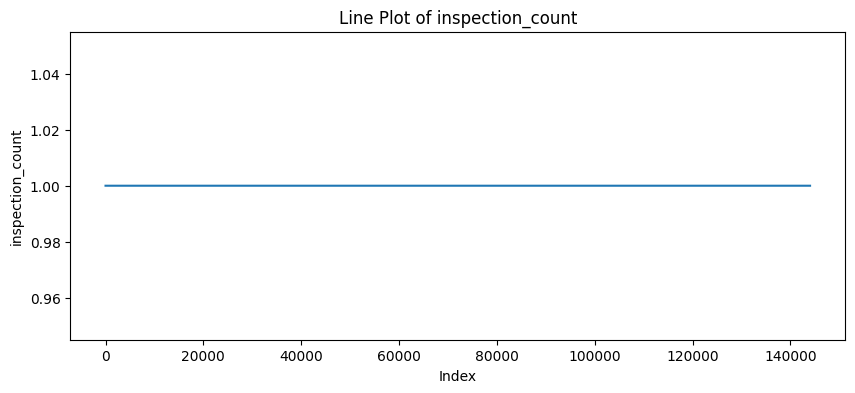

In [95]:
import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df[col].values)
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


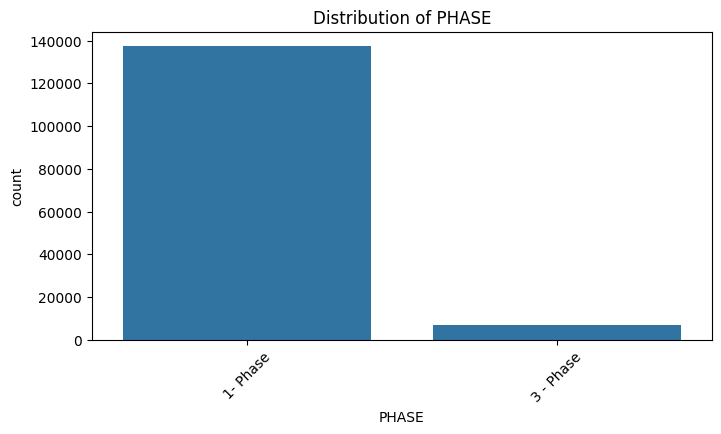

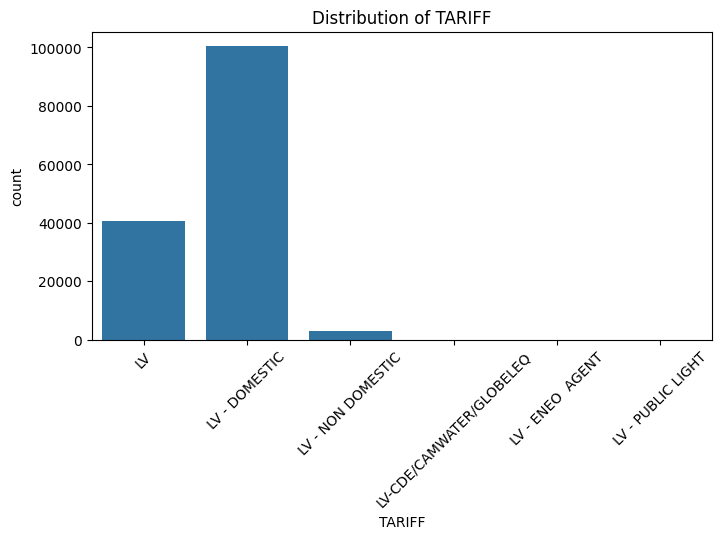

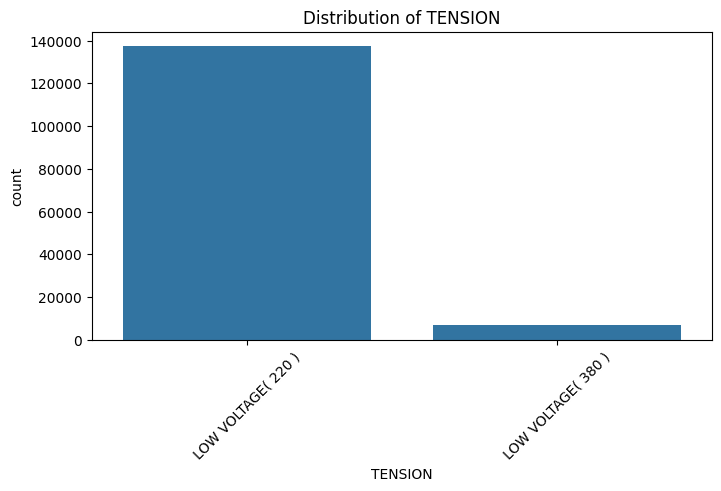

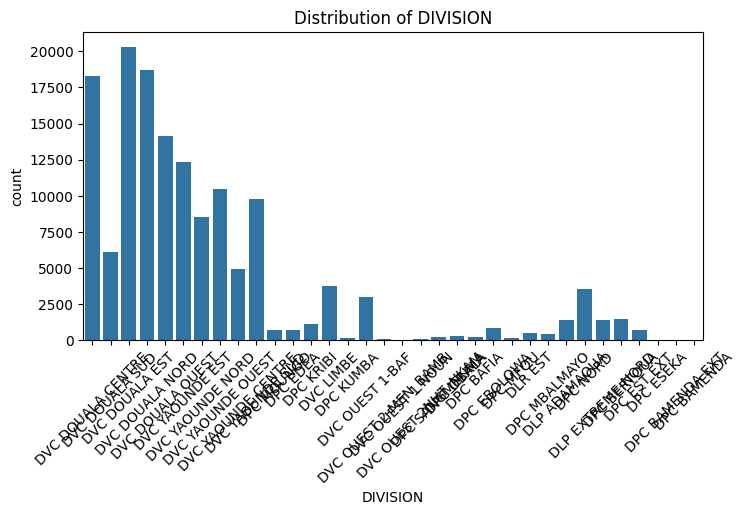

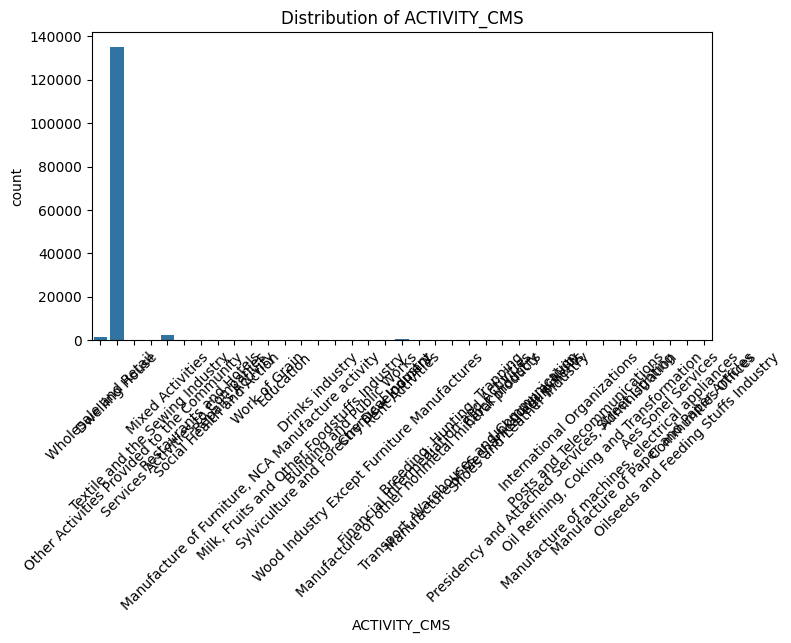

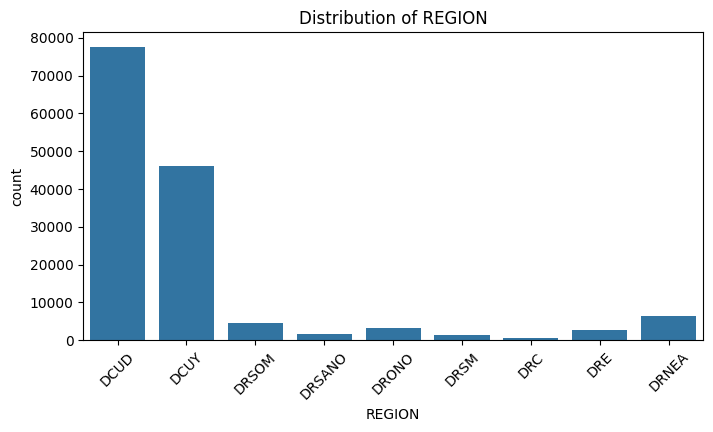

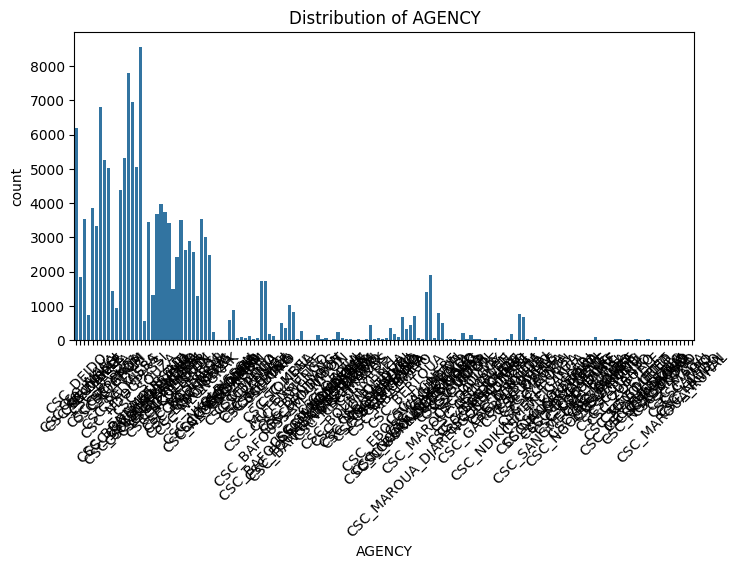

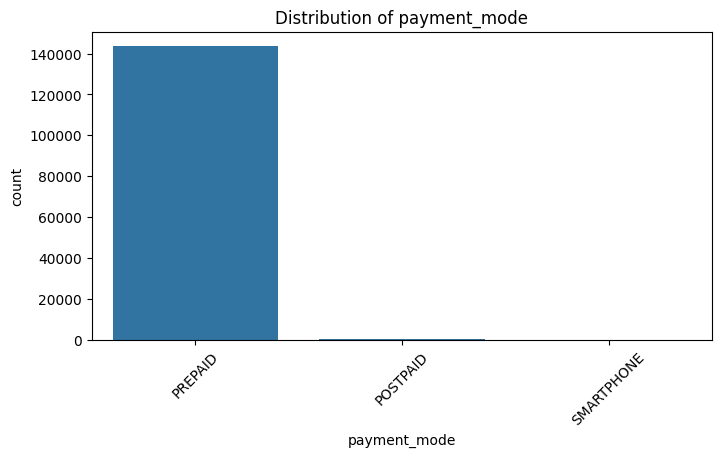

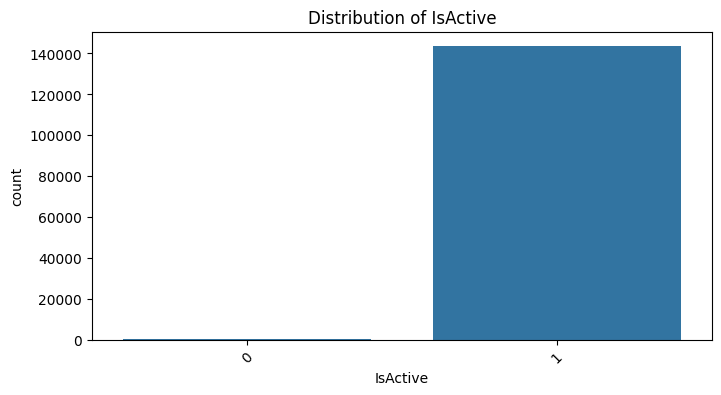

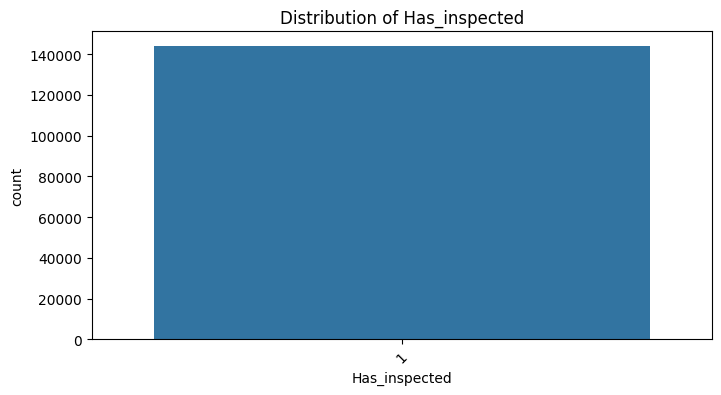

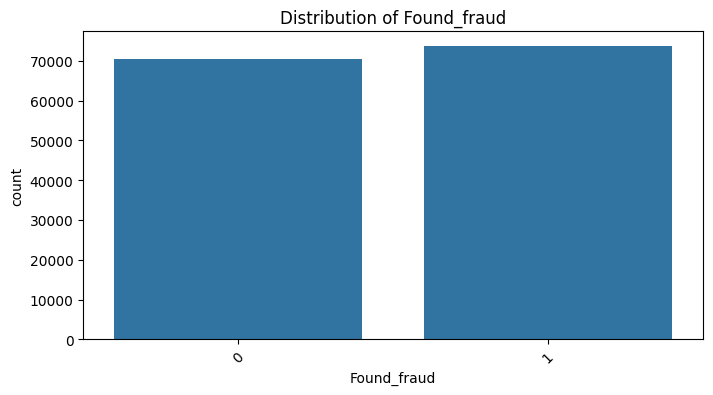

In [96]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [97]:
df.head()

,SERVICE_NBR,PHASE,TARIFF,POWER_SUSCRIBED,TENSION,DIVISION,ACTIVITY_CMS,REGION,AGENCY,payment_mode,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
0,200050072,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Wholesale and Retail,DCUD,CSC_DEIDO,PREPAID,1,7702,123.854545,196.9,77491.94,3,1,1,1,1
1,200050302,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,PREPAID,1,6443,52.777778,80.0,47500.00,0,1,1,1,1
2,200050326,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Wholesale and Retail,DCUD,CSC_DEIDO,PREPAID,1,7702,186.090323,359.9,467881.92,6,1,1,1,1
3,200050428,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,PREPAID,1,6614,36.470588,60.0,31000.00,1,1,1,1,1
4,200050460,1- Phase,LV,1.1,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Wholesale and Retail,DCUD,CSC_DEIDO,PREPAID,1,7702,89.592105,138.1,345087.48,5,1,1,1,1


In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [99]:
categorical_columns = ['PHASE', 'TARIFF', 'TENSION', 'DIVISION', 'ACTIVITY_CMS', 
                       'REGION', 'AGENCY', 'payment_mode']

In [100]:
for col in categorical_columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [101]:
df.head()

,SERVICE_NBR,PHASE,TARIFF,POWER_SUSCRIBED,TENSION,DIVISION,ACTIVITY_CMS,REGION,AGENCY,payment_mode,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
0,200050072,0,0,2.2,0,19,34,0,38,1,1,7702,123.854545,196.9,77491.94,3,1,1,1,1
1,200050302,0,0,2.2,0,19,7,0,38,1,1,6443,52.777778,80.0,47500.00,0,1,1,1,1
2,200050326,0,0,2.2,0,19,34,0,38,1,1,7702,186.090323,359.9,467881.92,6,1,1,1,1
3,200050428,0,0,2.2,0,19,7,0,38,1,1,6614,36.470588,60.0,31000.00,1,1,1,1,1
4,200050460,0,0,1.1,0,19,34,0,38,1,1,7702,89.592105,138.1,345087.48,5,1,1,1,1


In [102]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [103]:
scaler=StandardScaler

In [104]:
scaler = StandardScaler()

# Scale all features except 'SERVaICE_NBR'
scaled_features = scaler.fit_transform(df.drop(['SERVICE_NBR','Found_fraud'], axis=1))


In [105]:
df_scaled=pd.DataFrame(scaled_features,columns=df.drop(['SERVICE_NBR','Found_fraud'],axis=1).columns)

In [106]:
df_scaled['SERVICE_NBR']=df['SERVICE_NBR']
df_scaled['Found_fraud']=df['Found_fraud']

In [108]:
df_scaled.head()
df_scaled.to_csv('scalprep.csv')

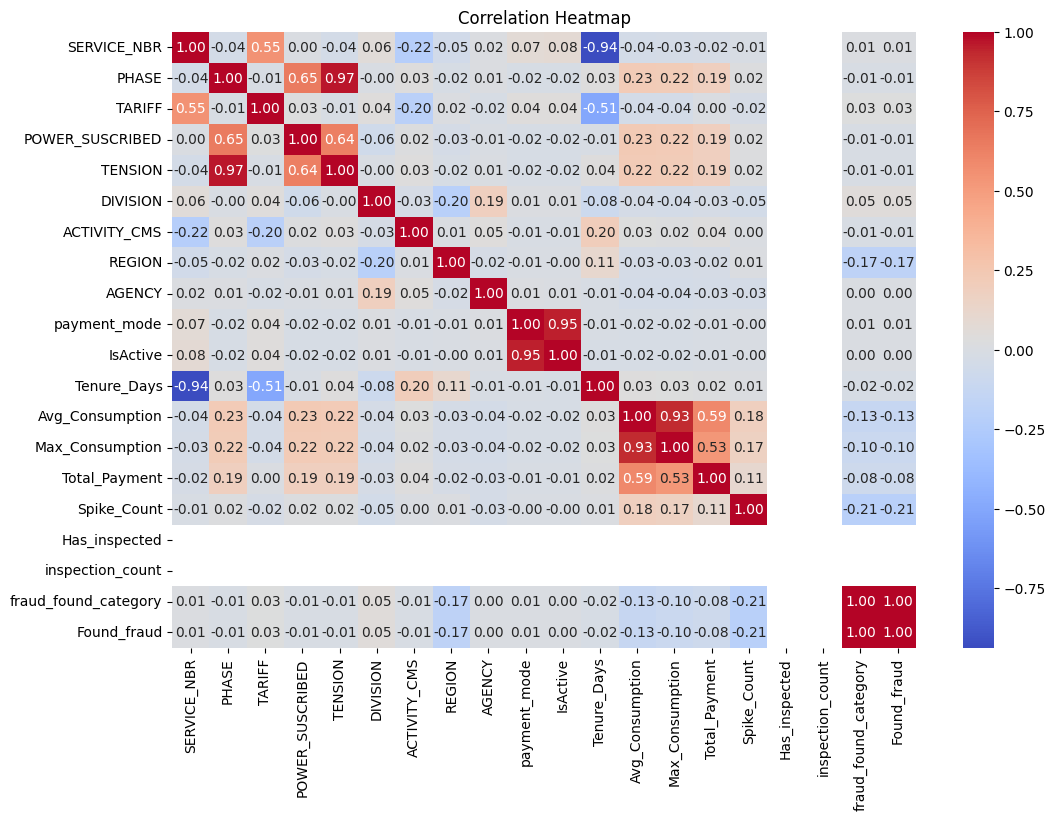

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap')
plt.show()



In [110]:
import pandas as pd
from scipy import stats

 
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Found_fraud')

anova_results = []

for col in numeric_cols:
    # Groups split by Found_fraud
    group0 = df[df['Found_fraud'] == 0][col].dropna()
    group1 = df[df['Found_fraud'] == 1][col].dropna()
    
    # Check if both groups have data
    if len(group0) > 1 and len(group1) > 1:
        f_stat, p_val = stats.f_oneway(group0, group1)
        anova_results.append({'Column': col, 'F-statistic': f_stat, 'P-value': p_val})
    else:
        anova_results.append({'Column': col, 'F-statistic': None, 'P-value': None})

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results)

# Show results sorted by p-value ascending (most significant first)
anova_df = anova_df.sort_values('P-value')

print(anova_df)


                  Column  F-statistic        P-value
7                 REGION  4426.116734   0.000000e+00
12       Avg_Consumption  2347.427257   0.000000e+00
15           Spike_Count  6529.262973   0.000000e+00
13       Max_Consumption  1499.712340   0.000000e+00
18  fraud_found_category          inf   0.000000e+00
14         Total_Payment   869.644721  1.445433e-190
5               DIVISION   385.090234   1.255842e-85
2                 TARIFF   123.962894   8.819070e-29
11           Tenure_Days    61.510415   4.434026e-15
0            SERVICE_NBR    23.480778   1.262990e-06
4                TENSION    20.414863   6.239316e-06
1                  PHASE    14.773336   1.212897e-04
3        POWER_SUSCRIBED    11.394388   7.368575e-04
6           ACTIVITY_CMS     5.861613   1.547583e-02
9           payment_mode     4.760399   2.912340e-02
10              IsActive     2.566375   1.091598e-01
8                 AGENCY     0.517216   4.720327e-01
16         Has_inspected          NaN         

C:\Users\HAI\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df is your DataFrame

# 1. Select features and target
X = df.select_dtypes(include=['number']).drop(columns=['Found_fraud', 'SERVICE_NBR'], errors='ignore')
y = df['Found_fraud']

# 2. Handle missing values - simple approach: drop rows with NaNs
data = pd.concat([X, y], axis=1).dropna()
X = data.drop('Found_fraud', axis=1)
y = data['Found_fraud']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 

# 5. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.673170393000972

Confusion Matrix:
 [[10224  3845]
 [ 5569  9166]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.68     14069
           1       0.70      0.62      0.66     14735

    accuracy                           0.67     28804
   macro avg       0.68      0.67      0.67     28804
weighted avg       0.68      0.67      0.67     28804



In [112]:
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.673170393000972

Confusion Matrix:
 [[10224  3845]
 [ 5569  9166]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.68     14069
           1       0.70      0.62      0.66     14735

    accuracy                           0.67     28804
   macro avg       0.68      0.67      0.67     28804
weighted avg       0.68      0.67      0.67     28804



In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:

model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[11833  2236]
 [ 2197 12538]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     14069
           1       0.85      0.85      0.85     14735

    accuracy                           0.85     28804
   macro avg       0.85      0.85      0.85     28804
weighted avg       0.85      0.85      0.85     28804


Accuracy Score: 0.8460977641994167


C:\Users\HAI\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
from sklearn.svm import SVC
# svm_clf = SVC(kernel='rbf', random_state=42)
# svm_clf.fit(X_train, y_train)

# # 6. Predict & evaluate
# y_pred = svm_clf.predict(X_test )

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [117]:
df[['SERVICE_NBR']].duplicated().sum()


np.int64(3530)

In [118]:
df[df.duplicated(subset=['SERVICE_NBR'], keep=False)].value_counts().max()


np.int64(8)

In [119]:
import pandas as pd
df=pd.read_csv('final_postpaid_customers_data_09-Jan-2025.csv')

In [120]:
df.head()

,SERVICE_NBR,PHASE,TARIFF,POWER_SUSCRIBED,TENSION,DIVISION,ACTIVITY_CMS,REGION,AGENCY,payment_mode,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
0,200050057,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,POSTPAID,1,7415,73.071429,112,55446,3,1,1,1,1
1,200050064,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,POSTPAID,1,7702,137.153846,244,132407,3,1,1,1,1
2,200050076,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,POSTPAID,1,7702,103.142857,188,104675,2,1,1,1,1
3,200050078,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,POSTPAID,1,7702,135.416667,266,116508,1,1,1,1,1
4,200050080,1- Phase,LV,2.2,LOW VOLTAGE( 220 ),DVC DOUALA CENTRE,Dwelling House,DCUD,CSC_DEIDO,POSTPAID,1,7702,117.307692,143,110503,1,1,1,1,1


In [121]:
df.shape

(126995, 20)

In [122]:
df[['SERVICE_NBR']].duplicated().sum()


np.int64(151)

In [123]:
df.isnull().sum()

SERVICE_NBR                 0
PHASE                       0
TARIFF                      0
POWER_SUSCRIBED             0
TENSION                     0
DIVISION                    0
ACTIVITY_CMS            12787
REGION                      0
AGENCY                      0
payment_mode                0
IsActive                    0
Tenure_Days                 0
Avg_Consumption             0
Max_Consumption             0
Total_Payment               0
Spike_Count                 0
Has_inspected               0
inspection_count            0
fraud_found_category        0
Found_fraud                 0
dtype: int64

In [124]:
df.describe()

,SERVICE_NBR,POWER_SUSCRIBED,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
count,1.269950e+05,126995.000000,126995.000000,126995.000000,1.269950e+05,1.269950e+05,1.269950e+05,126995.000000,126995.0,126995.000000,126995.000000,126995.000000
mean,2.019292e+08,6.151733,0.995457,4570.571897,1.036907e+03,1.108141e+04,3.496204e+05,1.700366,1.0,1.239797,1.066790,0.789630
std,1.294904e+06,9.403336,0.067252,2519.224035,1.798622e+05,2.852686e+06,1.080061e+06,1.785968,0.0,1.228659,0.453774,0.407573
min,2.000501e+08,0.000000,0.000000,-4491.000000,-7.500000e+00,0.000000e+00,0.000000e+00,0.000000,1.0,0.000000,0.000000,0.000000
25%,2.007712e+08,2.200000,1.000000,2319.000000,1.836364e+01,4.600000e+01,0.000000e+00,0.000000,1.0,1.000000,1.000000,1.000000
50%,2.017850e+08,2.200000,1.000000,4182.000000,9.823077e+01,1.930000e+02,5.632800e+04,1.000000,1.0,1.000000,1.000000,1.000000
75%,2.032707e+08,6.600000,1.000000,6867.000000,2.322500e+02,5.190000e+02,2.046335e+05,3.000000,1.0,1.000000,1.000000,1.000000
max,2.044394e+08,380.000000,1.000000,16158.000000,6.250027e+07,9.999989e+08,3.233701e+07,12.000000,1.0,20.000000,2.000000,1.000000


In [125]:
df['ACTIVITY_CMS'].value_counts()


ACTIVITY_CMS
Dwelling House                                        85198
Wholesale and Retail                                  16853
Mixed Activities                                       2621
Presidency and Attached Services, Administration       1850
Rent Activities                                        1206
Posts and Telecommunications                            779
Street Lighting                                         690
Other Activities Provided to the Community              682
Restaurants and Hotels                                  649
Work of Grain                                           425
Financial Intermediation and Activities                 333
Social Health and Action                                311
Education                                               311
Communities Offices                                     237
Manufacture of Furniture, NCA Manufacture activity      204
Transport, Warehouses and Communication                 198
Repairs Activity           

In [126]:
# Select all rows where any column is null
rows_with_any_null = df[df.isnull().any(axis=1)]
rows_with_any_null.Found_fraud.value_counts()

Found_fraud
1    11102
0     1685
Name: count, dtype: int64

In [127]:
df1 = df[['ACTIVITY_CMS', 'Found_fraud']]


In [128]:
df1.value_counts()

ACTIVITY_CMS                                      Found_fraud
Dwelling House                                    1              76190
Wholesale and Retail                              1               9823
Dwelling House                                    0               9008
Wholesale and Retail                              0               7030
Presidency and Attached Services, Administration  0               1758
                                                                 ...  
SNEC Services                                     1                  1
Shoes and Leather Industry                        1                  1
Unknown activity                                  0                  1
Utilities Companies - Free Mode                   0                  1
Utilities Companies - Preferential Mode           0                  1
Name: count, Length: 90, dtype: int64

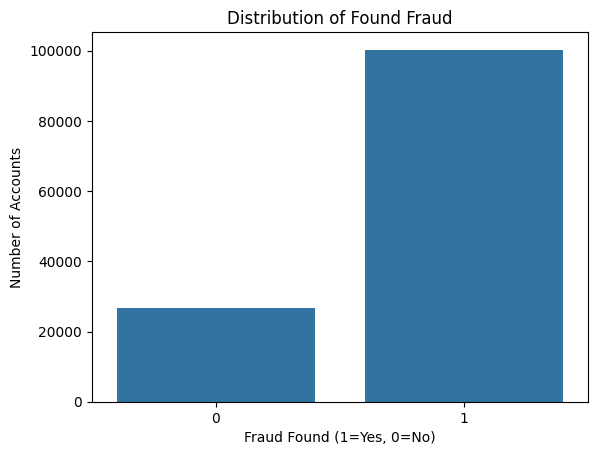

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of fraud distribution
sns.countplot(x='Found_fraud', data=df)
plt.title('Distribution of Found Fraud')
plt.xlabel('Fraud Found (1=Yes, 0=No)')
plt.ylabel('Number of Accounts')
plt.show()


In [130]:
categorical_columns = ['PHASE', 'TARIFF', 'TENSION', 'DIVISION', 'ACTIVITY_CMS', 
                       'REGION', 'AGENCY', 'payment_mode', 'IsActive', 'Has_inspected', 'Found_fraud']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for PHASE:
PHASE
1- Phase     92940
3 - Phase    34052
UNKNOWN          3
Name: count, dtype: int64

Value counts for TARIFF:
TARIFF
LV                          124602
LV - DOMESTIC                 1182
LV - NON DOMESTIC             1092
LV - PUBLIC LIGHT              111
LV - ENEO  AGENT                 5
LV-CDE/CAMWATER/GLOBELEQ         3
Name: count, dtype: int64

Value counts for TENSION:
TENSION
LOW VOLTAGE( 220 )    93213
LOW VOLTAGE( 380 )    33782
Name: count, dtype: int64

Value counts for DIVISION:
DIVISION
DVC DOUALA EST          19041
DVC DOUALA NORD         12890
DVC DOUALA CENTRE       12692
DVC YAOUNDE NORD        12375
DVC YAOUNDE EST         10119
DVC DOUALA SUD           9138
DVC YAOUNDE SUD          7994
DVC YAOUNDE OUEST        7662
DVC YAOUNDE CENTRE       7654
DVC DOUALA OUEST         4753
DPC NORD                 3291
DVC OUEST 1-BAF          2648
DLP EXTREME-NORD         1688
DVC LIMBE                1599
DVC OUEST 2NHT_NKAM      1593
DPC MOUNGO   

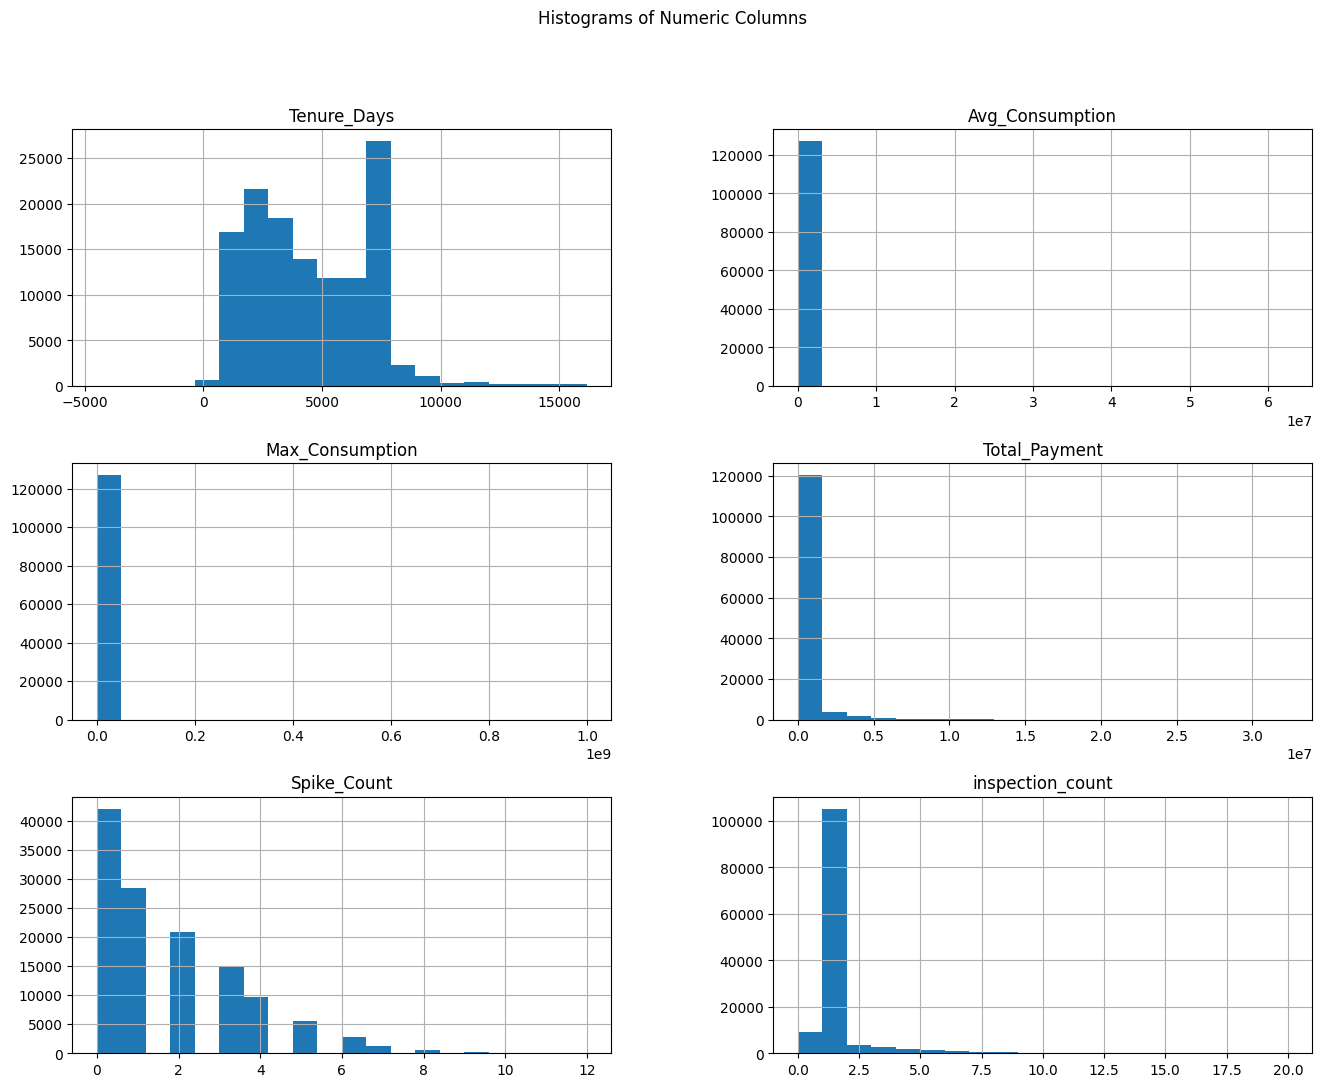

In [131]:
import matplotlib.pyplot as plt

numeric_columns = ['Tenure_Days', 'Avg_Consumption', 'Max_Consumption', 
                   'Total_Payment', 'Spike_Count', 'inspection_count']

df[numeric_columns].hist(bins=20, figsize=(16, 12))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

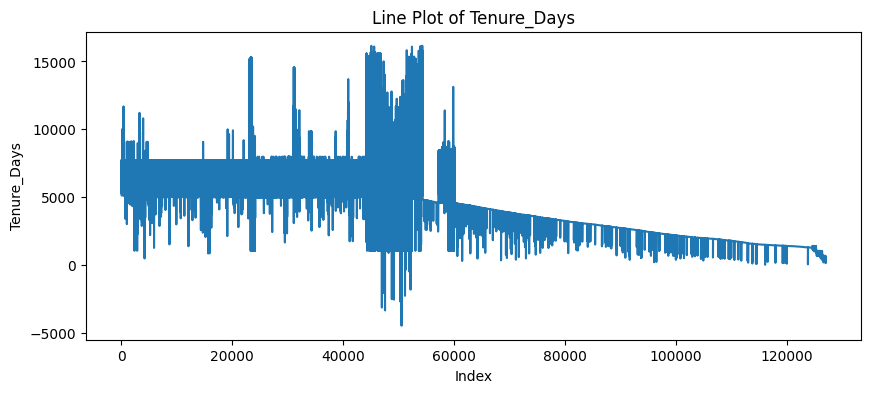

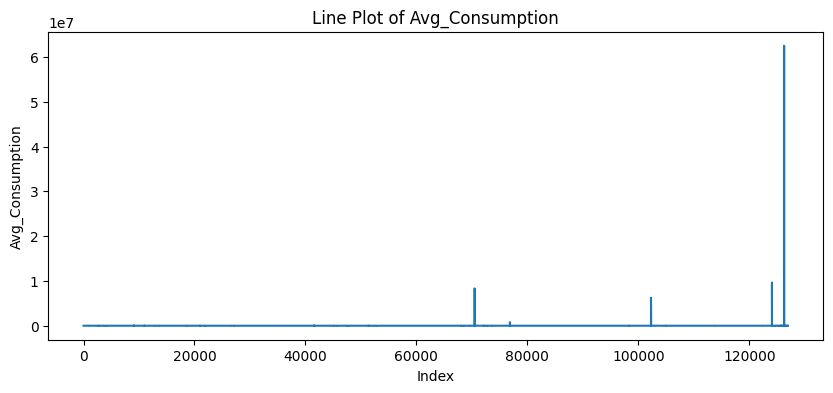

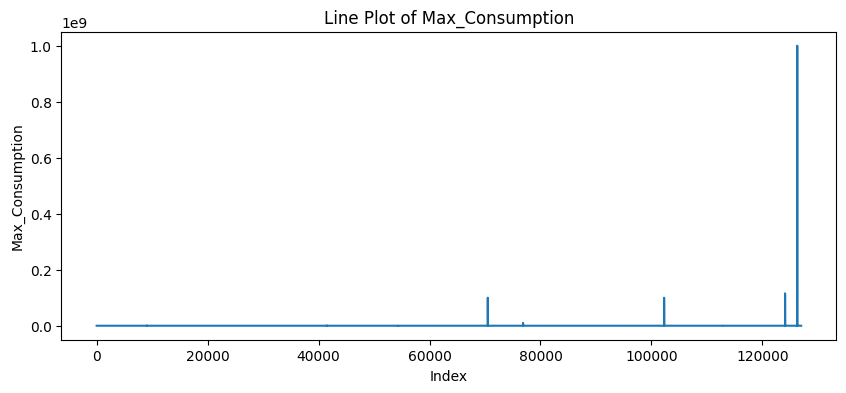

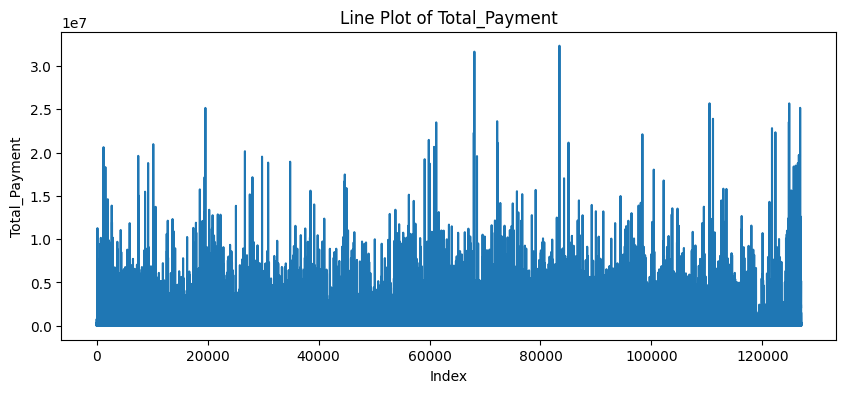

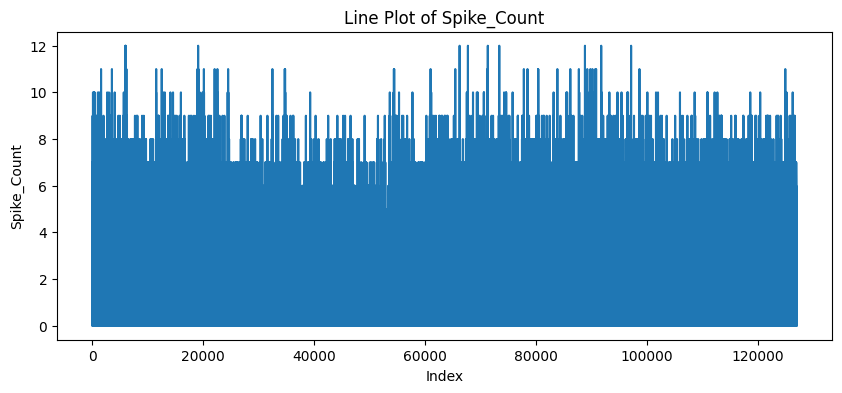

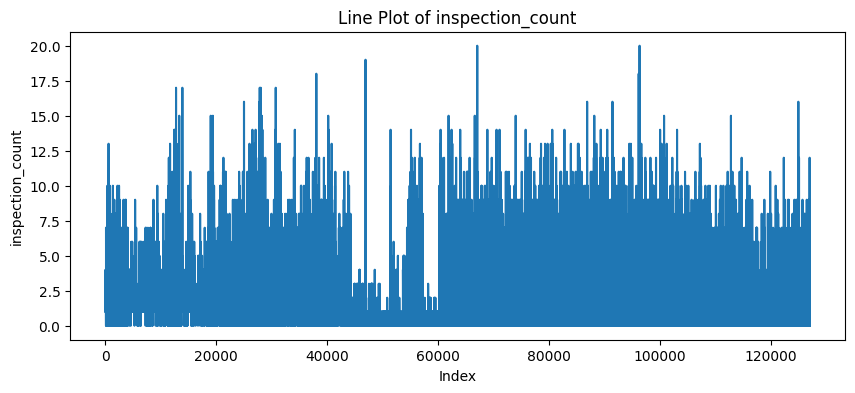

In [132]:
import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df[col].values)
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

In [133]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [136]:
categorical_columns = ['PHASE', 'TARIFF', 'TENSION', 'DIVISION', 'ACTIVITY_CMS', 
                       'REGION', 'AGENCY', 'payment_mode']

In [137]:
for col in categorical_columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [138]:
df.head()

,SERVICE_NBR,PHASE,TARIFF,POWER_SUSCRIBED,TENSION,DIVISION,ACTIVITY_CMS,REGION,AGENCY,payment_mode,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,Found_fraud
0,200050057,0,0,2.2,0,19,7,0,39,0,1,7415,73.071429,112,55446,3,1,1,1,1
1,200050064,0,0,2.2,0,19,7,0,39,0,1,7702,137.153846,244,132407,3,1,1,1,1
2,200050076,0,0,2.2,0,19,7,0,39,0,1,7702,103.142857,188,104675,2,1,1,1,1
3,200050078,0,0,2.2,0,19,7,0,39,0,1,7702,135.416667,266,116508,1,1,1,1,1
4,200050080,0,0,2.2,0,19,7,0,39,0,1,7702,117.307692,143,110503,1,1,1,1,1


In [139]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [140]:
scaler = StandardScaler()

# Scale all features except 'SERVaICE_NBR'
scaled_features = scaler.fit_transform(df.drop(['SERVICE_NBR','Found_fraud'], axis=1))


In [141]:
df_scaled=pd.DataFrame(scaled_features,columns=df.drop(['SERVICE_NBR','Found_fraud'],axis=1).columns)

In [142]:
df_scaled['SERVICE_NBR']=df['SERVICE_NBR']
df_scaled['Found_fraud']=df['Found_fraud']

In [145]:
df_scaled.head()

,PHASE,TARIFF,POWER_SUSCRIBED,TENSION,DIVISION,ACTIVITY_CMS,REGION,AGENCY,payment_mode,IsActive,Tenure_Days,Avg_Consumption,Max_Consumption,Total_Payment,Spike_Count,Has_inspected,inspection_count,fraud_found_category,SERVICE_NBR,Found_fraud
0,-0.605289,-0.122733,-0.42025,-0.602011,-0.630084,-0.651396,-0.644237,-0.802526,-0.214137,0.067559,1.129093,-0.005359,-0.003845,-0.272370,0.727695,0.0,-0.19517,-0.147188,200050057,1
1,-0.605289,-0.122733,-0.42025,-0.602011,-0.630084,-0.651396,-0.644237,-0.802526,-0.214137,0.067559,1.243018,-0.005002,-0.003799,-0.201113,0.727695,0.0,-0.19517,-0.147188,200050064,1
2,-0.605289,-0.122733,-0.42025,-0.602011,-0.630084,-0.651396,-0.644237,-0.802526,-0.214137,0.067559,1.243018,-0.005192,-0.003819,-0.226789,0.167772,0.0,-0.19517,-0.147188,200050076,1
3,-0.605289,-0.122733,-0.42025,-0.602011,-0.630084,-0.651396,-0.644237,-0.802526,-0.214137,0.067559,1.243018,-0.005012,-0.003791,-0.215834,-0.392151,0.0,-0.19517,-0.147188,200050078,1
4,-0.605289,-0.122733,-0.42025,-0.602011,-0.630084,-0.651396,-0.644237,-0.802526,-0.214137,0.067559,1.243018,-0.005113,-0.003834,-0.221393,-0.392151,0.0,-0.19517,-0.147188,200050080,1


In [146]:
df_scaled.to_csv('scale_post.csv')

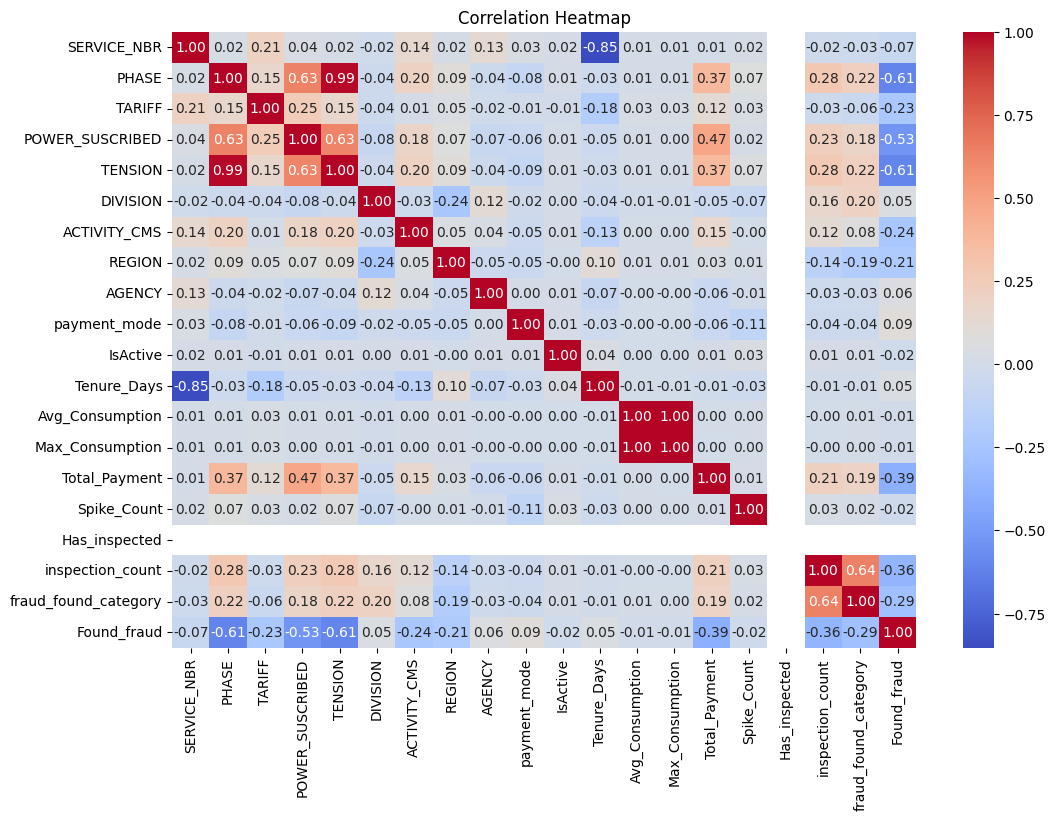

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap')
plt.show()



In [77]:
import pandas as pd
from scipy import stats
 
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Found_fraud')

anova_results = []

for col in numeric_cols:
    # Groups split by Found_fraud
    group0 = df[df['Found_fraud'] == 0][col].dropna()
    group1 = df[df['Found_fraud'] == 1][col].dropna()
    
    # Check if both groups have data
    if len(group0) > 1 and len(group1) > 1:
        f_stat, p_val = stats.f_oneway(group0, group1)
        anova_results.append({'Column': col, 'F-statistic': f_stat, 'P-value': p_val})
    else:
        anova_results.append({'Column': col, 'F-statistic': None, 'P-value': None})

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results)

# Show results sorted by p-value ascending (most significant first)
anova_df = anova_df.sort_values('P-value')

print(anova_df)


                  Column   F-statistic        P-value
1                  PHASE  75070.685445   0.000000e+00
2                 TARIFF   7011.191660   0.000000e+00
3        POWER_SUSCRIBED  50449.955315   0.000000e+00
4                TENSION  73575.770086   0.000000e+00
7                 REGION   5616.930314   0.000000e+00
6           ACTIVITY_CMS   8107.618774   0.000000e+00
14         Total_Payment  23108.107651   0.000000e+00
17      inspection_count  18572.274879   0.000000e+00
18  fraud_found_category  11240.865559   0.000000e+00
9           payment_mode   1146.283996  3.785564e-250
0            SERVICE_NBR    647.838801  1.506053e-142
8                 AGENCY    396.827499   3.686242e-88
5               DIVISION    287.682926   1.873156e-64
11           Tenure_Days    270.654911   9.444450e-61
15           Spike_Count     75.682996   3.369386e-18
10              IsActive     35.734964   2.266705e-09
12       Avg_Consumption     11.645699   6.437122e-04
13       Max_Consumption    

C:\Users\HAI\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df is your DataFrame

# 1. Select features and target
X = df.select_dtypes(include=['number']).drop(columns=['Found_fraud', 'SERVICE_NBR'], errors='ignore')
y = df['Found_fraud']

# 2. Handle missing values - simple approach: drop rows with NaNs
data = pd.concat([X, y], axis=1).dropna()
X = data.drop('Found_fraud', axis=1)
y = data['Found_fraud']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # 4. Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 5. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.857986534902949

Confusion Matrix:
 [[ 2869  2474]
 [ 1133 18923]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.54      0.61      5343
           1       0.88      0.94      0.91     20056

    accuracy                           0.86     25399
   macro avg       0.80      0.74      0.76     25399
weighted avg       0.85      0.86      0.85     25399



In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 2631  2712]
 [  644 19412]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.49      0.61      5343
           1       0.88      0.97      0.92     20056

    accuracy                           0.87     25399
   macro avg       0.84      0.73      0.77     25399
weighted avg       0.86      0.87      0.86     25399


Accuracy Score: 0.8678688137328241


C:\Users\HAI\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
